In [1]:
import json
import time

In [2]:
path = "/Users/stanislavsmirnov/Documents/Github_local/Sizeable_datasets/yelp_academic_dataset_review.json"
f = open(path, 'r')

In [3]:
dataset = []

for i in range(50000):
    dataset.append(json.loads(f.readline()))

In [4]:
dataset[0]

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

In [5]:
dataset_with_time_val = []

In [6]:
for d in dataset:
    d['date']
    d['timeStruct'] = time.strptime(d['date'], "%Y-%m-%d %H:%M:%S")
    d['timeInt'] = time.mktime(d['timeStruct'])
    dataset_with_time_val.append(d)
    
dataset_with_time_val[0]

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

In [7]:
# Generating some simple statistics

from collections import defaultdict

In [8]:
week_rating = defaultdict(list)

In [9]:
for d in dataset_with_time_val:
    day = d['timeStruct'].tm_wday
    week_rating[day].append(d['stars'])

In [15]:
week_rating

defaultdict(list,
            {2: [2.0,
              1.0,
              4.0,
              4.0,
              5.0,
              1.0,
              3.0,
              5.0,
              4.0,
              4.0,
              1.0,
              5.0,
              3.0,
              5.0,
              5.0,
              3.0,
              2.0,
              5.0,
              3.0,
              1.0,
              5.0,
              5.0,
              5.0,
              4.0,
              5.0,
              4.0,
              4.0,
              1.0,
              4.0,
              2.0,
              1.0,
              5.0,
              5.0,
              5.0,
              2.0,
              5.0,
              4.0,
              3.0,
              5.0,
              5.0,
              1.0,
              1.0,
              5.0,
              5.0,
              5.0,
              5.0,
              5.0,
              5.0,
              3.0,
              5.0,
              5.0,
          

In [10]:
week_adverage = {}

In [13]:
for d in week_rating:
    week_adverage[d] = sum(week_rating[d]) * 1.0 / len(week_rating[d])

In [14]:
week_adverage

{2: 3.733379597501735,
 5: 3.7657114127702362,
 4: 3.77428350116189,
 1: 3.7762811127379208,
 3: 3.7829129610730425,
 0: 3.6974025974025975,
 6: 3.730328396651642}

In [24]:
# drawing a plot

X = sorted(list(week_adverage.keys()))
print(X)
Y = [week_adverage[x] for x in X]
print(Y)

[0, 1, 2, 3, 4, 5, 6]
[3.6974025974025975, 3.7762811127379208, 3.733379597501735, 3.7829129610730425, 3.77428350116189, 3.7657114127702362, 3.730328396651642]


In [25]:
import matplotlib.pyplot as plt

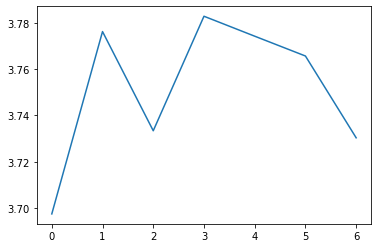

In [26]:
plt.plot(X, Y)

<BarContainer object of 7 artists>

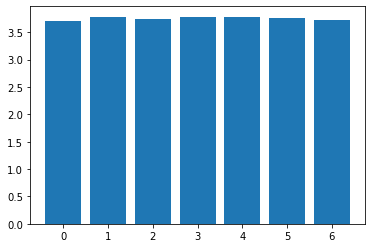

In [27]:
plt.bar(X,Y)

<BarContainer object of 7 artists>

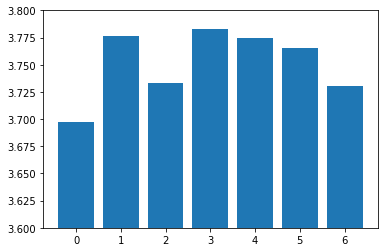

In [28]:
plt.ylim(3.6, 3.8)
plt.bar(X,Y)

<BarContainer object of 7 artists>

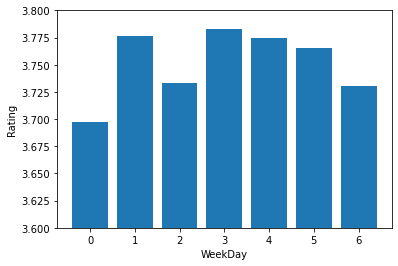

In [29]:
plt.ylim(3.6, 3.8)
plt.xlabel("WeekDay")
plt.ylabel("Rating")
plt.bar(X,Y)

In [30]:
plt.show()